# JPL Small-Body Mission Design API Tutorial

This Jupyter Notebook introduces the use of the JPL Small-Body Mission Design API. It will demonstrate how to query small body data, extract trajectory information, and use this data for planning or analysis purposes.

In [24]:
# Section 1: Import Required Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from astropy.time import Time
import numpy as np

In [25]:
# Section 2: API Overview and Base URL
base_url = "https://ssd-api.jpl.nasa.gov/mdesign.api"

In [26]:
# Section 3: Define a helper function to pretty-print JSON responses
def query_api(params):
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    return response.json()

In [90]:
# Section 4: Define Parameters for Pork-Chop Plot
# We'll sweep launch dates and TOF values for 1P/Halley
launch_start = Time('2033-01-01T00:00:00',format='isot').mjd

launch_span = 365*3 #Days 
tof_min = 90 #Days
tof_max = 1500 #Days


/Users/jwn0027/opt/anaconda3/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [91]:

# Section 5: Query and Build Pork-Chop Data Grid
target = "46P" #this is the short designation for the target
porkchop_data = []

print("Gathering pork-chop data (this may take a few minutes)...")
params = {
            "des": target,
            "mjd0": int(launch_date),
            "tof-min": tof_min,
            "tof-max": tof_max,
            "span": 90,
            "step":1,
        }
        
try:
    result = query_api(params)
    traj_data = result["selectedMissions"]
except Exception as e:
    print(f"Failed for {launch_date} TOF {tof}: {e}")    
print('Done')


Gathering pork-chop data (this may take a few minutes)...
Done


In [92]:
#Check out our data columns
pprint(result["fields"])
df = pd.DataFrame(traj_data,columns=result["fields"])
print(df)

['MJD0',
 'MJDf',
 'vinf_dep',
 'vinf_arr',
 'phase_ang',
 'earth_dist',
 'elong_arr',
 'decl_dep',
 'approach_ang',
 'tof']
     MJD0   MJDf  vinf_dep  vinf_arr  phase_ang  earth_dist  elong_arr  \
0   60679  62829   12.2413    1.2061     116.48      4.6290      16.40   
1   63274  63654   12.2378   19.7774       5.47      5.4135      57.75   
2   62894  63284   12.2343   14.6473       5.72      5.2987      70.45   
3   61464  61814   12.2298   21.5760       5.45      5.3450      37.92   
4   65094  65489   12.2253   17.4614       5.44      5.3200      73.92   
..    ...    ...       ...       ...        ...         ...        ...   
75  63099  64434    1.0113   10.6451      83.90      1.8492      28.23   
76  58929  60454    0.9993   11.1597     108.62      2.0343      10.82   
77  62974  64434    0.8300   11.0095     100.57      1.8492      28.23   
78  62709  64434    0.7728   10.6917      88.52      1.8492      28.23   
79  62629  64434    0.7483   11.0623      96.95      1.8492  

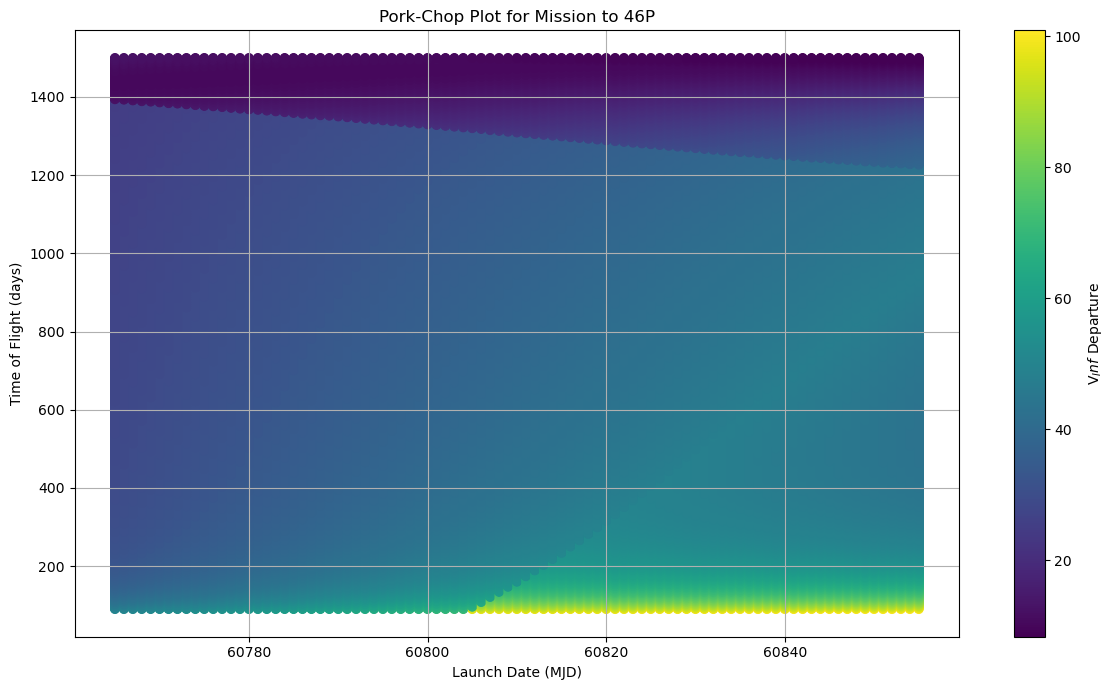

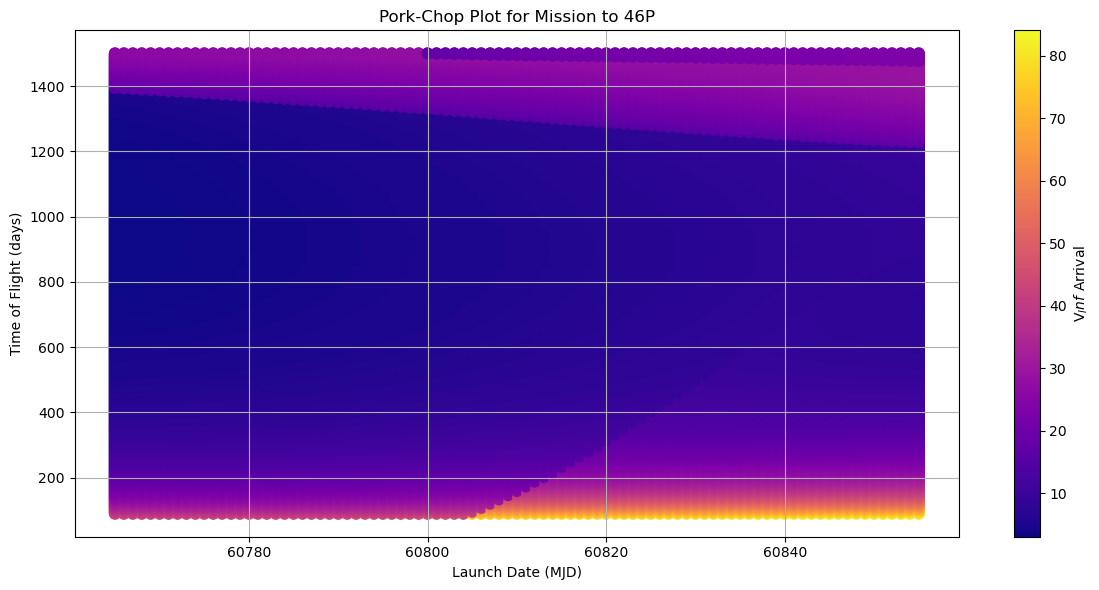

In [93]:
#Section 6: Build DataFrame and Generate Pork-Chop Plot

# Pivot data for contour plot
#pivot = df.pivot(index='tof', columns='MJD0', values='vinf_dep')
#X, Y = np.meshgrid(pivot.columns, pivot.index)
#Z = pivot.values

#Departure velocity
dep_date = result["dep_date"]
tof = result["tof"]
vinf_dep = result["vinf_dep"]
vinf_arr = result["vinf_arr"]

dep_mesh,tof_mesh = np.meshgrid(dep_date,tof)

# Convert launch dates back to datetime for labels
#launch_labels = [datetime.fromordinal(int(jd)) for jd in pivot.columns]

plt.figure(figsize=(12, 7))
#cp = plt.contour(X,Y,Z,levels=5,cmap='viridis')
cp = plt.scatter(dep_mesh, tof_mesh, c=vinf_dep, cmap='viridis')
plt.colorbar(cp, label='V$_Inf$ Departure')
plt.title(f"Pork-Chop Plot for Mission to {target}")
plt.xlabel("Launch Date (MJD)")
plt.ylabel("Time of Flight (days)")
#plt.xticks(ticks=pivot.columns[::5], labels=[d.strftime('%Y-%m-%d') for d in launch_labels[::5]], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Section 6:V_inf Arrival plot
plt.figure(figsize=(12, 6))
filtered = df.dropna(subset=['vinf_arr'])
sc = plt.scatter(dep_mesh, tof_mesh, c=vinf_arr, cmap='plasma', s=60)
plt.colorbar(sc, label='V$_Inf$ Arrival')
plt.xlabel("Launch Date (MJD)")
plt.ylabel("Time of Flight (days)")
plt.title(f"Pork-Chop Plot for Mission to {target}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
#Get some statistics on this particular query
print(f"Average Time of Flight:"+str(np.mean(df['tof'])))
print(f"Median Time of Flight:"+str(np.median(df['tof'])))
print(f"Lowest Intercept Velocity:"+str(np.min(df['vinf_arr'])))
print(f"Lowest Departure Velocity:"+str(np.min(df['vinf_dep'])))
print(f"Lowest Intercept Velocity:"+str(np.min(df['vinf_arr'])))
print(f"Lowest Departure Velocity:"+str(np.min(df['vinf_dep'])))


Average Time of Flight:1501.5
Median Time of Flight:1575.0
Lowest Intercept Velocity:0.2964
Lowest Departure Velocity:0.2193
Lowest Intercept Velocity:0.2964
Lowest Departure Velocity:0.2193


_End of notebook_